# Data Design and Pandas Basics

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## 1.Data Design

### 1.1 A prequel: when sampling fails

When sampling method fails: __Dewey Defeats Truman__

https://www.textbook.ds100.org/ch/02/design_dewey_truman.html

A 1936 poll predicted a landslide defeat for FDR. It turned out that even though the poll interviewed almost 2 million subjects, it was mostly conducted over phone, a relatively valuable possession at the time, and thus precluded a less wealthy mass, introducing selection bias into the sample.

 1948 Gallup used quota sampling to avoid this downfall. In their sampling scheme, each interviewer polled a set number of people from each demographic class. However the prediction was also askew: they predicted Thomas Dewey would earn 5% more of the popular vote than Harry Truman would. The result was the other way around: Truman won by more than 5%. 
 
What went wrong? Although quota sampling did help pollsters reduce sampling bias, it introduced bias in another way. The Gallup Poll told its interviewers that as long as they fulfilled their quotas __they could interview whomever they wished__. Here's one possible explanation for why the interviewers ended up polling a disproportionate number of Republicans: at the time, Republicans were on average wealthier and more likely to live in nicer neighborhoods, making them easier to interview. This observation is supported by the fact that the Gallup Poll predicted __2-6% more Republican votes__ than the actual results for the 3 elections prior.

We now rely on probability sampling, a family of sampling methods that assigns precise probabilities to the appearance of each sample, to reduce bias as much as possible in our data collection process.

### 1.2 Sampling techniques

Why is probabiliy sampling important? Only when we ascertain probabibility in sampling, do they admit the interpretation as a sample from a data generation process.

Three major techniques:

- __Simple Random Sampling__
- __Cluster Sampling__. divide the population into clusters, then pick one cluster at random. Easy to conduct: most polling agencies today use towns as clusters, and survey the town. 
- __Stratifed Sampling__. divide the popluation into strata, then produce a randome sample out of each strata. Ensures a proper representation of the population. The proper strata size isn't always knowable.

### 1.3 SRS vs "Big Data"

Estimates based on large datasets tend to be less biased, but when the sampling pool is itself a biased represetation of the population, the that accuracy becomes a source of error. See the simualation for SRS vs Big data for 2012 poll.

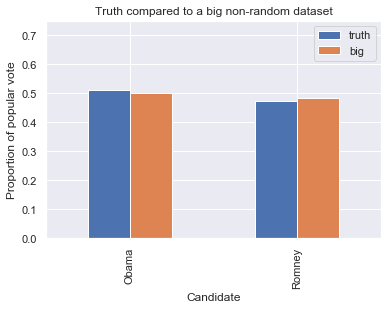

In [11]:
# HIDDEN
total = 129085410
obama_true_count = 65915795
romney_true_count = 60933504
obama_true = obama_true_count / total
romney_true = romney_true_count / total

# 1 percent off
obama_big = obama_true - 0.01
romney_big = romney_true + 0.01

# HIDDEN
pd.DataFrame({
    'truth': [obama_true, romney_true],
    'big': [obama_big, romney_big],
}, index=['Obama', 'Romney'], columns=['truth', 'big']).plot.bar()
plt.title('Truth compared to a big non-random dataset')
plt.xlabel('Candidate')
plt.ylabel('Proportion of popular vote')
plt.ylim(0, 0.75);

C:\Users\nleea\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
C:\Users\nleea\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


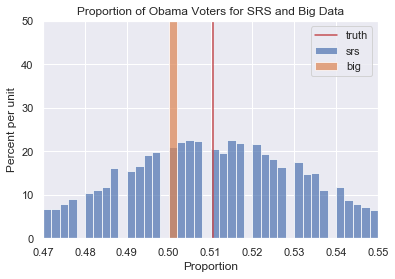

In [15]:
srs_size = 400
big_size = 60000000
replications = 10000

def resample(size, prop, replications):
    return np.random.binomial(n=size, p=prop, size=replications) / size

srs_simulations = resample(srs_size, obama_true, replications)
big_simulations = resample(big_size, obama_big, replications)

bins = bins=np.arange(0.47, 0.55, 0.002)
plt.hist(srs_simulations, bins=bins, alpha=0.7, normed=True, label='srs')
plt.hist(big_simulations, bins=bins, alpha=0.7, normed=True, label='big')

plt.title('Proportion of Obama Voters for SRS and Big Data')
plt.xlabel('Proportion')
plt.ylabel('Percent per unit')
plt.xlim(0.47, 0.55)
plt.ylim(0, 50)
plt.axvline(x=obama_true, color='r', label='truth')
plt.legend();

__Takeaways__ 

Before accepting the results of a data analysis, it pays to carefully inspect the quality of the data. In particular, we must ask the following questions:

1. __Is the data a census__ (does it include the entire population of interest)? If so, we can just compute properties of the population directly without having to use inference.
2. __If the data is a sample__, how was the sample collected? To properly conduct inference, the sample should have been collected according to a _completely described probability sampling method_.
3. What changes were made to the data before producing results? Do any of these changes affect the quality of the data?

## 2. Data Structure and Pandas Basics

In [16]:
!ls

babynames.zip
DataDesign&PandasBasic.ipynb
DataScience_LifeCycleOverview.ipynb
